In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [50]:
df = pd.read_csv(r'C:\Users\KOSTAS\Desktop\projects\E_D_A-projects-python\Spotify_Analysis\data\merged_Spotify.csv')

In [51]:
pd.set_option("display.max_columns", None)
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,month,release_date,playlist_genre,track_popularity,feat
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,11.0,1999-11-02,NaN,NaN,No
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,11.0,1999-11-02,rock,69.0,No
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,11.0,1999-11-02,NaN,NaN,No
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,11.0,1999-11-02,NaN,NaN,No
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,11.0,1999-11-02,rap,66.0,No


# General Analysis

### 1. Are releases of tracks increasing as years pass?

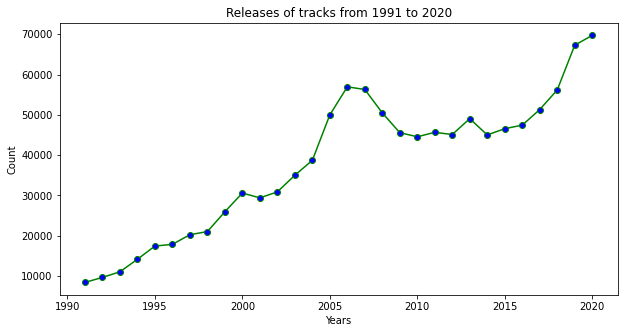

In [52]:
track_rel = df['year'].value_counts().sort_values(key = lambda x: x.keys())

# plot
plt.figure(figsize=(10,5))

plt.plot(track_rel, color='green',marker='o',markerfacecolor='blue')
plt.title('Releases of tracks from 1991 to 2020')
plt.xlabel('Years')
plt.ylabel('Count') 
plt.show()

### 2. Average number of tracks in album (and further relevant exploration)

In [53]:
num_songs = df['album_id'].value_counts().sort_values(key = lambda x: x.keys())
print("Maximum tracks in album:",num_songs.max())
print("Minimum tracks in album:",num_songs.min())

Maximum tracks in album: 50
Minimum tracks in album: 1


In [54]:
print("Average tracks in album:",round(num_songs.mean()),"tracks")

Average tracks in album: 10 tracks


#### How many albums have only 1 track?

In [55]:
print(len(num_songs[num_songs.values == 1]),"albums consist of only 1 track (singles)")

20939 albums consist of only 1 track (singles)


#### How does the average number of tracks in album changes over the years?

In [56]:
my_years = [i for i in range(1991,2021)]
avg_lst = []
for year in my_years:
    df_year = df[df['year'] == year]
    years_mean = df_year.groupby('album_id').count()['id'].mean()
    avg_lst.append(round(years_mean))
avg_tr_alb_year = dict(zip(my_years,avg_lst))

In [57]:
avg_tr_alb_year

{1991: 13,
 1992: 14,
 1993: 13,
 1994: 13,
 1995: 14,
 1996: 14,
 1997: 14,
 1998: 14,
 1999: 14,
 2000: 14,
 2001: 13,
 2002: 13,
 2003: 13,
 2004: 13,
 2005: 13,
 2006: 13,
 2007: 13,
 2008: 12,
 2009: 12,
 2010: 12,
 2011: 11,
 2012: 11,
 2013: 10,
 2014: 10,
 2015: 9,
 2016: 8,
 2017: 8,
 2018: 7,
 2019: 6,
 2020: 6}

In [58]:
avg_tr_alb_year_ser = pd.Series(avg_tr_alb_year) # transform the dictionary to pandas series

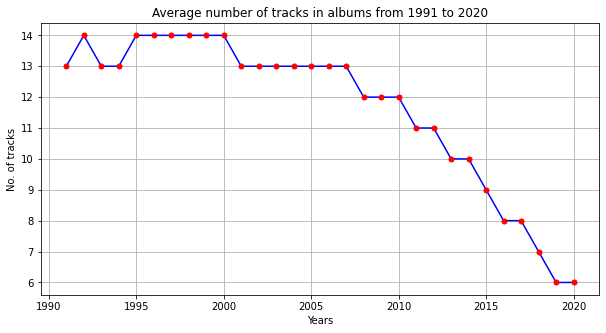

In [59]:
# plot
plt.figure(figsize=(10,5))

plt.plot(avg_tr_alb_year_ser, color='blue',marker='.',markerfacecolor='red',markersize=10,markeredgecolor='red')
plt.title('Average number of tracks in albums from 1991 to 2020')
plt.xlabel('Years')
plt.ylabel('No. of tracks') 
plt.grid()
plt.show()
# Obviously, the average number of tracks per album decreases as years pass

#### Number of albums per year

In [60]:
# My idea: Each album begins from 'track_number' == 1. Hence it is enough to count how many such '1's exist, since we do not 
# care about how many tracks each album contains, but we do care about how many albums exist per year

In [61]:
num_alb_year = []
for year in my_years:
    df_year = df[df['year'] == year]
    sub_df_year = df_year[df_year['track_number'] == 1]
    num_alb_year.append(len(sub_df_year))
num_alb_year_dict = dict(zip(my_years,num_alb_year))
num_alb_year_ser = pd.Series(num_alb_year_dict)

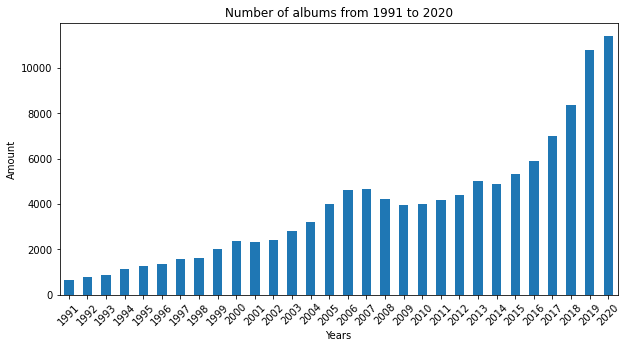

In [62]:
# plot
plt.figure(figsize=(10,5))

num_alb_year_ser.plot.bar(rot = 45)
plt.title('Number of albums from 1991 to 2020')
plt.xlabel('Years')
plt.ylabel('Amount') 
plt.show()

# We waited for something like that, if we consider the plot at the beginning, counting the number of tracks per year

### 3. Number of FEATS per year

#### What is the ratio of tracks that are FEATs?

In [63]:
feat_ratio = len(df[df['feat'] == 'Yes'])/df.shape[0] * 100
print("The ratio of songs that are 'feat' is",round(feat_ratio,2),"%")

The ratio of songs that are 'feat' is 23.36 %


#### Do feats (i.e. cooperations) increase as years pass?

In [64]:
feat_ser = df.groupby(['year', 'feat']).size()
feat_ser.head(5)

year  feat
1991  No      5244
      Yes     3136
1992  No      6391
      Yes     3248
1993  No      7149
dtype: int64

In [65]:
# Create a dataframe from the series above:
feat_df = feat_ser.unstack(level = -1)

feat_df.head()

feat,No,Yes
year,,
1991,5244,3136
1992,6391,3248
1993,7149,3868
1994,8890,5240
1995,10684,6733


In [66]:
modified_feat = feat_df.reset_index() # transform year to a column

modified_feat.head()

feat,year,No,Yes
0,1991,5244,3136
1,1992,6391,3248
2,1993,7149,3868
3,1994,8890,5240
4,1995,10684,6733


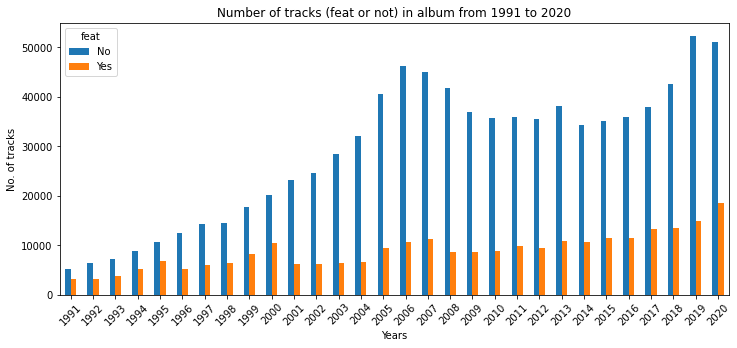

In [67]:
#plot

modified_feat.plot(x='year', y=['No','Yes'], kind="bar",rot=45,figsize=(12,5))
plt.title('Number of tracks (feat or not) in album from 1991 to 2020')
plt.xlabel('Years')
plt.ylabel('No. of tracks') 
plt.show()
# Slight increase of feats the last years, obviously, songs that are not feat are much more, except maybe early 1990's,
# where we see that feats are almost the half of non feat songs 

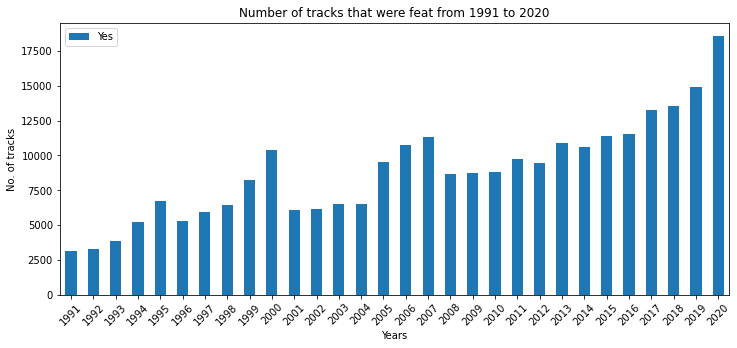

In [68]:
modified_feat.plot(x='year', y='Yes', kind="bar",rot=45,figsize=(12,5))
plt.title('Number of tracks that were feat from 1991 to 2020')
plt.xlabel('Years')
plt.ylabel('No. of tracks') 
plt.show()

### 4. Which month do the most track releases occure?

In [78]:
rel_per_month = df.groupby('month').count()['id']

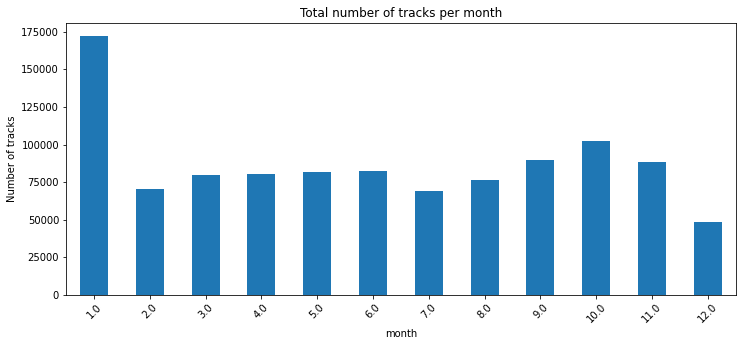

In [79]:
rel_per_month.plot(kind="bar",rot=45,figsize=(12,5))
plt.title('Total number of tracks per month')
plt.xlabel('month')
plt.ylabel('Number of tracks') 
plt.show()
# We see that in January, there are significantly more track releases than the other months

# We see that in December we have the least released tracks, probably because there is few time until the year pass
# and hence the song will not be considered as "hit" of the upcoming year

#### Which month do most albums release (2015-2020)

In [80]:
rel_per_month_2015_2020 = df[df['year']>=2015].groupby('month').count()['album_id']

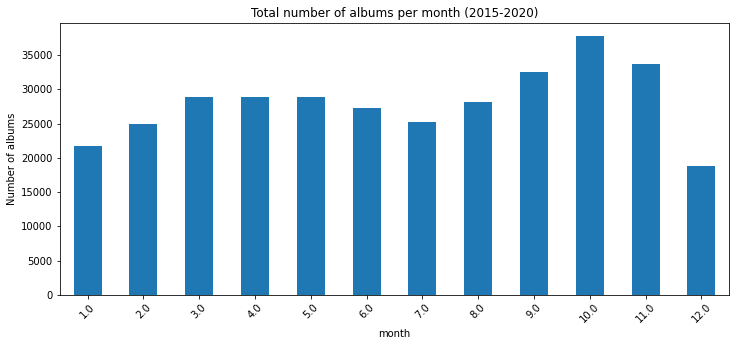

In [102]:
rel_per_month_2015_2020.plot(kind="bar",rot=45,figsize=(12,5))
plt.title('Total number of albums per month (2015-2020)')
plt.xlabel('month')
plt.ylabel('Number of albums') 
plt.show()

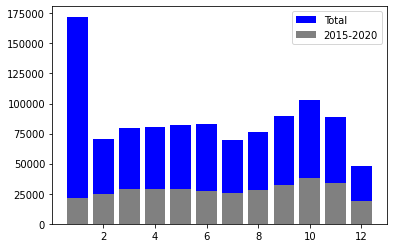

In [104]:
plt.bar(rel_per_month.keys(), rel_per_month.values, color='b')
plt.bar(rel_per_month_2015_2020.keys(), rel_per_month_2015_2020.values, color='grey')
plt.legend(["Total","2015-2020"])
plt.show()

#### Mean popularity of tracks per month (In total)

In [53]:
pop_per_month = df.groupby('month').mean()['track_popularity']
pop_per_month

month
1.0     55.434211
2.0     51.338843
3.0     54.202703
4.0     57.633880
5.0     57.126984
6.0     57.412556
7.0     54.843243
8.0     61.798942
9.0     58.508197
10.0    57.309963
11.0    59.985185
12.0    64.393103
Name: track_popularity, dtype: float64

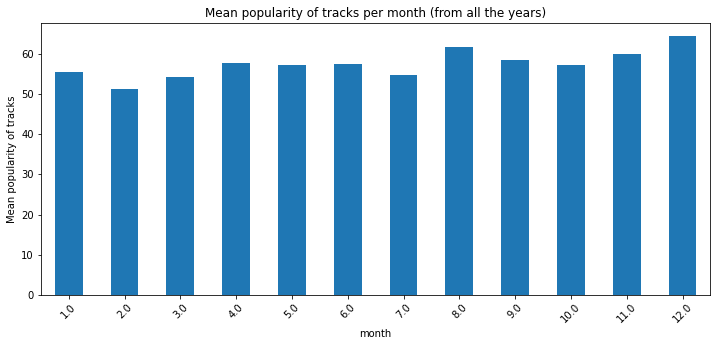

In [54]:
pop_per_month.plot(kind="bar",rot=45,figsize=(12,5))
plt.title('Mean popularity of tracks per month (from all the years)')
plt.xlabel('month')
plt.ylabel('Mean popularity of tracks') 
plt.show()

#### Mean popularity of tracks per month (for 2019)

In [55]:
pop_per_month_2019 = df[df['year']==2019].groupby('month').mean()['track_popularity']
pop_per_month_2019

month
1.0     63.250000
2.0     55.800000
3.0     60.392857
4.0     63.948276
5.0     67.630435
6.0     63.943396
7.0     64.307692
8.0     66.312500
9.0     61.258065
10.0    65.848485
11.0    63.369565
12.0    67.666667
Name: track_popularity, dtype: float64

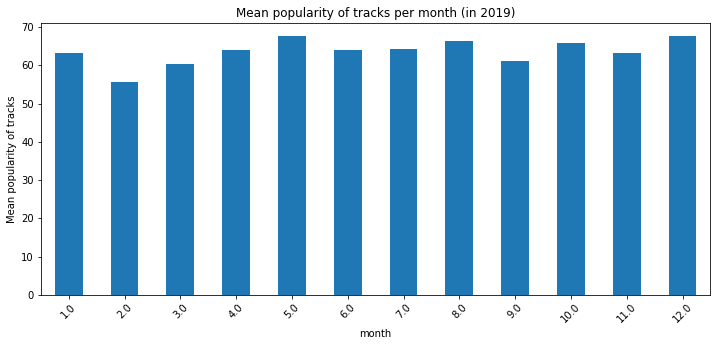

In [56]:
pop_per_month_2019.plot(kind="bar",rot=45,figsize=(12,5))
plt.title('Mean popularity of tracks per month (in 2019)')
plt.xlabel('month')
plt.ylabel('Mean popularity of tracks') 
plt.show()

In [57]:
# We observe that although in December we have the least released tracks, their mean popularity is the highest

# Analysis part_1

### 1. Which are the most popular music genres today and how have they varied in the past years?

In [106]:
print(df[df['year'] == 2020]['track_popularity'].value_counts(dropna=False).head(1).values[0],"out of",
      len(df[df['year']==2020])
     ,"songs in 2020 have no value for 'track_popularity'")

69695 out of 69726 songs in 2020 have no value for 'track_popularity'


#### Lets see the results from 2011 - 2019 

In [107]:
recent_years = [i for i in range(2011,2020)]
top_genres_lst = []

pop_mean = []
latin_mean = []
rock_mean = []
edm_mean = []
rb_mean = []
rap_mean = []

for year in recent_years:
    df_year = df[df['year'] == year] 
    top_genres = df_year.groupby('playlist_genre').mean()['track_popularity'].sort_values(ascending = False)
    top_genres_lst.append(top_genres.head(1).keys()[0])
    
    # Plot the mean values per year for each genre
    pop_mean.append(top_genres['pop'])
    latin_mean.append(top_genres['latin'])
    
    #2012 has no rock songs
    if 'rock' in top_genres.keys():
        rock_mean.append(top_genres['rock'])
    
    edm_mean.append(top_genres['edm'])
    rb_mean.append(top_genres['r&b'])
    rap_mean.append(top_genres['rap'])
    
    print("Top genres for the year",year,"are:")
    print("\n")
    print(top_genres)
    print("\n")

Top genres for the year 2011 are:


playlist_genre
pop      65.666667
rock     63.250000
latin    58.000000
edm      55.000000
r&b      47.500000
rap      43.000000
Name: track_popularity, dtype: float64


Top genres for the year 2012 are:


playlist_genre
pop      70.750000
latin    66.000000
edm      46.666667
r&b      39.500000
rap      36.833333
Name: track_popularity, dtype: float64


Top genres for the year 2013 are:


playlist_genre
rock     64.75000
pop      60.47619
rap      52.80000
latin    44.00000
edm      42.00000
r&b      39.50000
Name: track_popularity, dtype: float64


Top genres for the year 2014 are:


playlist_genre
pop      62.478261
rock     57.800000
r&b      47.111111
edm      46.200000
rap      41.700000
latin    34.666667
Name: track_popularity, dtype: float64


Top genres for the year 2015 are:


playlist_genre
pop      63.800000
rap      58.894737
r&b      54.541667
latin    46.857143
rock     46.444444
edm      45.846154
Name: track_popularity, dtype: float

In [108]:
top_genres_lst1 = [genre for genre in top_genres_lst if genre != max(set(top_genres_lst), key = top_genres_lst.count)]
print(max(set(top_genres_lst), key = top_genres_lst.count),"was the most popular genre for",
      top_genres_lst.count(max(set(top_genres_lst), key = top_genres_lst.count)), 
      "years, from 2011-2019, followed by",
     max(set(top_genres_lst1), key = top_genres_lst1.count))

pop was the most popular genre for 5 years, from 2011-2019, followed by latin


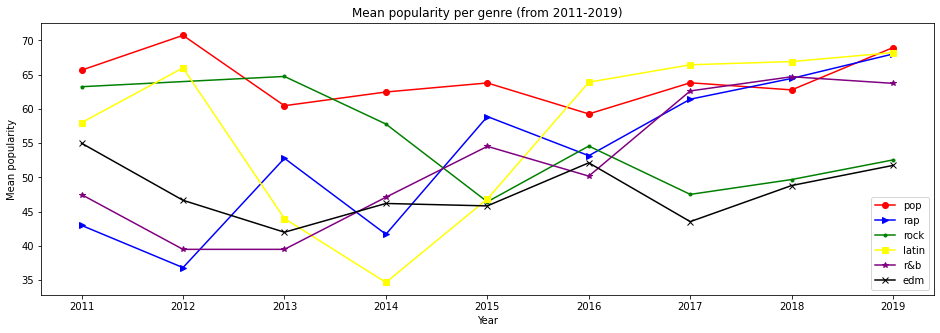

In [114]:
plt.figure(figsize=(16,5))

plt.plot(recent_years , pop_mean, color='red', label='pop',marker='o')
plt.plot(recent_years, rap_mean, color='blue', label='rap',marker='>')

# no 'rock' records in 2012
plt.plot([i for i in range(2011,2020) if i != 2012], rock_mean, color='green', label='rock', marker = '.')

plt.plot(recent_years, latin_mean, color='yellow', label='latin', marker = 's')
plt.plot(recent_years, rb_mean, color='purple', label='r&b', marker = '*')
plt.plot(recent_years, edm_mean, color='black', label='edm', marker = 'x')
plt.legend()

plt.xlabel('Year')
plt.ylabel('Mean popularity') 
plt.title('Mean popularity per genre (from 2011-2019)')
plt.show()

#### Releases per genre from 2011 to 2019

In [110]:
# Create a dataframe using 'df', grabbing only years from 2011-2019
decade_df = pd.DataFrame() # empty dataframe
for year in recent_years:
    y_df = df[df['year'] == year]
    decade_df = decade_df.append(y_df)

C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_15408/3532922393.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decade_df = decade_df.append(y_df)
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_15408/3532922393.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decade_df = decade_df.append(y_df)
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_15408/3532922393.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decade_df = decade_df.append(y_df)
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_15408/3532922393.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decade_df = decade_df.append(y_df)
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_154

In [111]:
# pop 
pop_df = decade_df[decade_df['playlist_genre'] == 'pop']
pop_releases = pop_df.groupby('year').count()['id']

#rap
rap_df = decade_df[decade_df['playlist_genre'] == 'rap']
rap_releases = rap_df.groupby('year').count()['id']

#rock
rock_df = decade_df[decade_df['playlist_genre'] == 'rock']
rock_releases = rock_df.groupby('year').count()['id']

#latin
latin_df = decade_df[decade_df['playlist_genre'] == 'latin']
latin_releases = latin_df.groupby('year').count()['id']

#r&b
rb_df = decade_df[decade_df['playlist_genre'] == 'r&b']
rb_releases = rb_df.groupby('year').count()['id']

#edm
edm_df = decade_df[decade_df['playlist_genre'] == 'edm']
edm_releases = edm_df.groupby('year').count()['id']

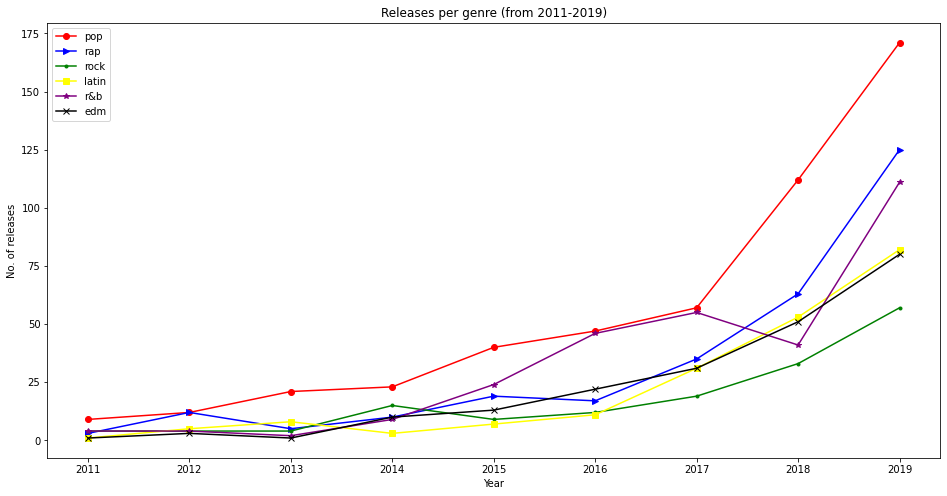

In [112]:
plt.figure(figsize=(16,8))

plt.plot(pop_releases, color='red', label='pop',marker='o')
plt.plot(rap_releases, color='blue', label='rap',marker='>')
plt.plot(rock_releases, color='green', label='rock', marker = '.')
plt.plot(latin_releases, color='yellow', label='latin', marker = 's')
plt.plot(rb_releases, color='purple', label='r&b', marker = '*')
plt.plot(edm_releases, color='black', label='edm', marker = 'x')
plt.legend()
plt.xlabel('Year')
plt.ylabel('No. of releases') 
plt.title('Releases per genre (from 2011-2019)')
plt.savefig("rel_per_genre.png")
plt.show()

# We can see that the most released genre in these years was 'pop'

### Quick Dataframe transformation

In [113]:
"""
Corrected the 'artists' column, that was transformed incorrectly during the data cleaning.
Moreover, added a column 'main_artist' to get the first artist of the track, if there were more than two.
"""

"\nCorrected the 'artists' column, that was transformed incorrectly during the data cleaning.\nMoreover, added a column 'main_artist' to get the first artist of the track, if there were more than two.\n"

#### Problem with songs that are feats:

In [66]:
df[df['id'] == '6f807x0ima9a1j3VPbc7VN']
# Here, although 'Ed Sheeran' is in the artists, it will be counted as his song, since there are other artists as well

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,month,release_date,playlist_genre,track_popularity,feat
790048,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,I Don't Care (with Justin Bieber) [Loud Luxury...,2oCs0DGTsRO98Gh5ZSl2Cx,"['Ed Sheeran', 'Justin Bieber', 'Loud Luxury']","['6eUKZXaKkcviH0Ku9w2n3V', '1uNFoZAHBGtllmzznp...",1,1,False,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,4.0,2019,6.0,2019-06-14,pop,66.0,Yes


In [44]:
def my_func(string):
    a = string.replace("]","")
    b = a.replace("[","")
    c = b.split(',')
    return c

In [45]:
df['artists'] = list(map(my_func,df['artists']))

In [70]:
def grab_first(lst):
    return lst[0]

In [71]:
# I will make the assumption that the artist who appears first, is the main artist of the song
df.insert(4,"main_artist",df['artists'].apply(grab_first))

#### Observation

In [ ]:
"""
Grabing only the first artist like above, there is a problem. When, next, we will count how many tracks an artist has done,
using the main artist column, we will ommit those who were feat with him. For example, if a track is made by [future, weeknd],
using the 'main_artist' column, we will only use future. An idea to take care of that would be the following:

In the artists column (which contains list of artists), we must find that with the most artist.

This could be done as follows:
Create a list with elements of 'artists' column, then make a set so we do not have duplicates.
Then we can define a function which finds the maximum length of a list, inside a nested list.
So if we find for example that max len == 4, meaning that we have 4 artists, we can create, besides 'main_artist' column,
3 other columns (2nd_artist,3rd_artist,4rth_artist). There we will put the artists, and if a song has say only 2 artists,
the '3rd_artist', '4rth_artist' columns will be NaN.
Then we could count on these 4 columns, about how many tracks an artist has.
"""

### 2. Which artists are in the top 10 list? Which of them was in the same list the previous 3 years?

In [72]:
print("Number of tracks in 2020 that have 'track_popularity' record:",sum(df[df['year'] == 2020]['track_popularity'].value_counts())
     ,"out of",len(df[df['year'] == 2020]),"tracks")

Number of tracks in 2020 that have 'track_popularity' record: 31 out of 69726 tracks


#### Since we have too few records, we will work for 2016,2017,2018,2019

In [73]:
print("Number of tracks in 2019 that have 'track_popularity' record:",len(df.loc[(df['year'] == 2019) & (df['track_popularity']>=0)])
     ,"out of",len(df[df['year'] == 2020]),"tracks")

Number of tracks in 2019 that have 'track_popularity' record: 626 out of 69726 tracks


#### Top 10 artists for 2019

In [74]:
df_2019 = df[(df['year'] == 2019) & (df['track_popularity']>=0)]

In [75]:
artists_top_track = df_2019.groupby('main_artist').max()['track_popularity'].sort_values(ascending=False).head(50)
artists_top_track.head(10) # Display the top-10 of the list

main_artist
'Tones And I'       100.0
'Roddy Ricch'        98.0
'Dua Lipa'           97.0
'Camila Cabello'     94.0
'Travis Scott'       94.0
'Regard'             94.0
'Anuel AA'           93.0
'Y2K'                91.0
'Lil Uzi Vert'       91.0
'Ed Sheeran'         91.0
Name: track_popularity, dtype: float64

#### Notice: The result above is misleading, since we obtain the 'hits' of 2019. For example:

In [76]:
print("Number of tracks 'Tones and I' released in 2019:",len(df_2019[df_2019['main_artist'] == "'Tones And I'"]))
print("Mean track popularity of 'Tones and I' tracks:",df_2019.groupby('main_artist').mean()['track_popularity']["'Tones And I'"])

Number of tracks 'Tones and I' released in 2019: 7
Mean track popularity of 'Tones and I' tracks: 78.71428571428571


In [77]:
df_2019[df_2019['main_artist'] == "'Tones And I'"][['name','album','track_popularity']].sort_values('track_popularity',ascending=False).reset_index(drop=True)

,name,album,track_popularity
0,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,100.0
1,Dance Monkey,The Kids Are Coming,92.0
2,Never Seen The Rain,The Kids Are Coming,84.0
3,Johnny Run Away,The Kids Are Coming,71.0
4,The Kids Are Coming,The Kids Are Coming,69.0
5,Jimmy,The Kids Are Coming,68.0
6,Colourblind,The Kids Are Coming,67.0


In [78]:
# Observation: Dance Monkey exists twice (in different albums), and since it was a huge 'hit', it lifts the artist's popularity.
# However, we can not say so easy that 'Tones and I' was the most succeed artist of 2019.

In [79]:
# Hence, we will consider the number of tracks per artist and their mean popularity

##### Tracks per artist in 2019

In [80]:
tracks_per_artist_2019 = df_2019.groupby('main_artist').count()['id'].sort_values(ascending=False).head(50)
tracks_per_artist_2019.head(10)

main_artist
'Ed Sheeran'          13
'Camila Cabello'      10
'Khalid'               9
'Tyga'                 8
'Upchurch'             8
'Ozuna'                8
'NLE Choppa'           7
'Young Thug'           7
'Tones And I'          7
'The Chainsmokers'     7
Name: id, dtype: int64

#### From the artists above, find the mean popularity of their songs

In [81]:
more_than_4 = tracks_per_artist_2019[tracks_per_artist_2019>4] # Artists from above with more than 4 tracks

In [82]:
more_than_4

main_artist
'Ed Sheeran'          13
'Camila Cabello'      10
'Khalid'               9
'Tyga'                 8
'Upchurch'             8
'Ozuna'                8
'NLE Choppa'           7
'Young Thug'           7
'Tones And I'          7
'The Chainsmokers'     7
'Sech'                 6
'Lil Nas X'            6
'24kGoldn'             6
'Roddy Ricch'          6
'Doja Cat'             6
'Becky G'              5
'David Guetta'         5
'Zara Larsson'         5
'Comethazine'          5
'Sam Feldt'            5
'YNW Melly'            5
Name: id, dtype: int64

In [83]:
artist_2019_lst = [i for i in more_than_4.keys()]
my_df_2019 = df_2019[df_2019['main_artist'].isin(artist_2019_lst)]

In [84]:
# From the artists with more than 4 tracks (recall that the average number of tracks per album in 2019 was 6)
# we will consider the mean track popularity of their songs

In [85]:
top_art_2019 = my_df_2019.groupby('main_artist').mean()['track_popularity'].sort_values(ascending=False)
top_art_2019.head(10) # TOP 10 artists in 2019 

main_artist
'Roddy Ricch'       84.333333
'YNW Melly'         82.000000
'Lil Nas X'         81.166667
'Sech'              81.000000
'Young Thug'        79.142857
'Tones And I'       78.714286
'Camila Cabello'    77.500000
'NLE Choppa'        77.428571
'Doja Cat'          76.666667
'Ed Sheeran'        73.307692
Name: track_popularity, dtype: float64

#### From the artists above, what was the genre of their songs?

In [86]:
top_2019_genres = pd.Series([]) # empty series
for art in top_art_2019.head(10).keys():
    top_2019_genres = top_2019_genres.append(my_df_2019[my_df_2019['main_artist'] == art]['playlist_genre'])
top_2019_genres

C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_13540/199708856.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  top_2019_genres = pd.Series([]) # empty series
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_13540/199708856.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_2019_genres = top_2019_genres.append(my_df_2019[my_df_2019['main_artist'] == art]['playlist_genre'])
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_13540/199708856.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_2019_genres = top_2019_genres.append(my_df_2019[my_df_2019['main_artist'] == art]['playlist_genre'])
C:\Users\KOSTAS\AppData\Local\Temp/ipykernel_13540/199708856.py:3: FutureWarning: The series.append method 

887485     rap
887528     rap
1064307    rap
1064308    rap
1064313    rap
          ... 
860541     pop
872396     pop
872996     pop
884312     pop
896052     r&b
Length: 73, dtype: object

In [87]:
top_2019_genres.value_counts() # we expected that, since if we recall the graph for the mean popularity of each genre,
# pop and rap were on top. Also, they were top at track releases in 2019

pop      31
rap      27
r&b       8
latin     6
edm       1
dtype: int64

### For the previous years, firstly we observe the following:

In [88]:
df_2016 = df[(df['year'] == 2016)]

In [89]:
df_2016['track_popularity'].unique()#.sort_values(key = lambda x: x.keys(), ascending = False) -> keys = popularity, 
                                                                                                 # did it to see the top

array([nan, 42., 65., 50., 52., 66., 57., 58., 59., 55., 53., 56., 60.,
       54., 47., 61., 27., 44., 45., 67., 49., 34., 70., 74., 79., 77.,
       73., 63., 51., 33., 62., 85., 69., 25., 26., 48., 43., 41., 78.,
       40., 76., 68.,  1.,  0., 18., 17., 19., 72., 30., 38., 75., 64.,
       22., 81., 46., 82., 71., 35., 86., 32.])

In [90]:
df_2016['track_popularity'].isnull().sum() # many Nan's

47272

#### Situation for the three previous years (solution)

In [91]:
my_years = [2016,2017,2018]
artists_16_17_18 = []
for year in my_years:
    df_year = df[(df['year'] == year) & (df['track_popularity'] > 0)] 
    w_year = df_year.groupby('main_artist').count()['id'].sort_values(ascending=False).head(10) # num. of songs in year
    artist_lst_year = [i for i in w_year.keys()]
    my_df_year = df_year[df_year['main_artist'].isin(artist_lst_year)]
    y_year = my_df_year.groupby('main_artist').mean()['track_popularity'].sort_values(ascending=False).head(10)
    for j in y_year.keys(): # list with names of the artists
        artists_16_17_18.append(j)
    print("Top 10 artists for the year",year,"are:")
    print("\n")
    print(y_year)
    print("\n")
# If we wanted access in the elements of the series below, we should code seperately for each year  

Top 10 artists for the year 2016 are:


main_artist
'Fifth Harmony'       71.333333
'Sia'                 69.000000
'Beyoncé'             67.500000
'Solange'             56.400000
'Marshmello'          55.666667
'The Chainsmokers'    55.200000
'Anderson .Paak'      55.000000
'MZ'                  35.800000
'GoldLink'            34.500000
'Paperwhite'          24.200000
Name: track_popularity, dtype: float64


Top 10 artists for the year 2017 are:


main_artist
'Ozuna'               71.000000
'SZA'                 70.000000
'Daniel Caesar'       67.250000
'Dua Lipa'            64.857143
'Ghostemane'          58.166667
'BROCKHAMPTON'        56.909091
'The Chainsmokers'    56.100000
'Martin Garrix'       55.857143
'Kygo'                54.800000
'Alan Walker'         30.250000
Name: track_popularity, dtype: float64


Top 10 artists for the year 2018 are:


main_artist
'Bad Bunny'           73.444444
'Khalid'              72.500000
'Ozuna'               67.833333
'Clean Bandit'        67.1

In [92]:
print(artists_16_17_18 )
# Recall that this list contains the names of the artists above. 
# I want to find who of them appear three times in the list, i.e. were top-10 for 2016,2017,2018

["'Fifth Harmony'", "'Sia'", "'Beyoncé'", "'Solange'", "'Marshmello'", "'The Chainsmokers'", "'Anderson .Paak'", "'MZ'", "'GoldLink'", "'Paperwhite'", "'Ozuna'", "'SZA'", "'Daniel Caesar'", "'Dua Lipa'", "'Ghostemane'", "'BROCKHAMPTON'", "'The Chainsmokers'", "'Martin Garrix'", "'Kygo'", "'Alan Walker'", "'Bad Bunny'", "'Khalid'", "'Ozuna'", "'Clean Bandit'", "'Calvin Harris'", "'Jorja Smith'", "'Marshmello'", "'Martin Garrix'", "'The Chainsmokers'", "'Javiera Mena'"]


In [93]:
from collections import Counter
import operator

In [94]:
my_dict = Counter(artists_16_17_18)
result = sorted(my_dict.items(),key=operator.itemgetter(1),reverse=True)
print(result)

[("'The Chainsmokers'", 3), ("'Marshmello'", 2), ("'Ozuna'", 2), ("'Martin Garrix'", 2), ("'Fifth Harmony'", 1), ("'Sia'", 1), ("'Beyoncé'", 1), ("'Solange'", 1), ("'Anderson .Paak'", 1), ("'MZ'", 1), ("'GoldLink'", 1), ("'Paperwhite'", 1), ("'SZA'", 1), ("'Daniel Caesar'", 1), ("'Dua Lipa'", 1), ("'Ghostemane'", 1), ("'BROCKHAMPTON'", 1), ("'Kygo'", 1), ("'Alan Walker'", 1), ("'Bad Bunny'", 1), ("'Khalid'", 1), ("'Clean Bandit'", 1), ("'Calvin Harris'", 1), ("'Jorja Smith'", 1), ("'Javiera Mena'", 1)]


In [95]:
top_art = []
for i in my_dict.keys():
    if my_dict[i] == 3:
        top_art.append(i)
print(top_art)

["'The Chainsmokers'"]


#### Where "The Chainsmokers" in top-10 in 2019?

In [96]:
### I will write a code, which would work if we had more artists in the list above and not only "The Chainsmokers"

In [97]:
result = []
for i in top_art:
    if i in top_art_2019.keys():
        result.append([i,top_art_2019[i]]) # artist and mean 'popularity' of their songs in 2019

In [98]:
sorted(result, key = lambda x: x[1], reverse = True) # This would sort with the top artist, if we had more (more data)

[["'The Chainsmokers'", 67.0]]

### 3. Do the songs become more explicit or not as the years pass? What about their popularity?

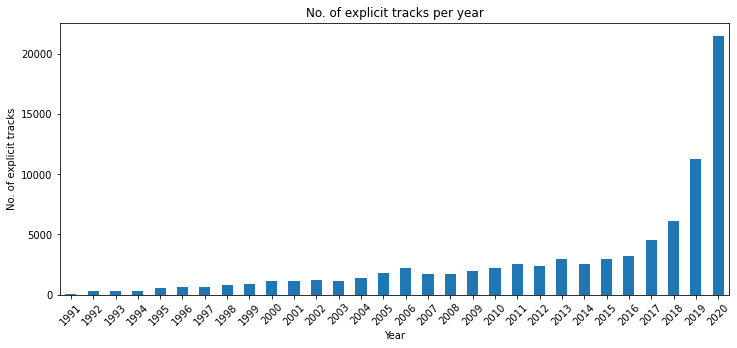

In [116]:
expl_tracks = df.groupby('year')['explicit'].apply(lambda x: x[x == True].count())

expl_tracks.plot(kind="bar",rot=45,figsize=(12,5))
plt.title('No. of explicit tracks per year')
plt.xlabel('Year')
plt.ylabel('No. of explicit tracks') 
plt.show()

# We can see a huge "jump" in 2020

#### Ratio of explicit songs per year

In [100]:
expl_ser = df.groupby(['year','explicit']).size()
expl_ser

year  explicit
1991  False        8303
      True           77
1992  False        9345
      True          294
1993  False       10674
      True          343
1994  False       13818
      True          312
1995  False       16879
      True          538
1996  False       17231
      True          609
1997  False       19610
      True          619
1998  False       20182
      True          831
1999  False       25037
      True          894
2000  False       29446
      True         1129
2001  False       28266
      True         1112
2002  False       29621
      True         1240
2003  False       33863
      True         1133
2004  False       37311
      True         1385
2005  False       48195
      True         1782
2006  False       54734
      True         2211
2007  False       54609
      True         1678
2008  False       48716
      True         1759
2009  False       43607
      True         1956
2010  False       42296
      True         2254
2011  False       43111
 

In [101]:
# Create new dataframe from the series above
expl_df = expl_ser.unstack(level = -1)

modified_expl = expl_df.reset_index()
modified_expl.head()

explicit,year,False,True
0,1991,8303,77
1,1992,9345,294
2,1993,10674,343
3,1994,13818,312
4,1995,16879,538


In [102]:
modified_expl['ratio'] = round(modified_expl[True]/(modified_expl[True] + modified_expl[False]) * 100,2)
modified_expl.tail()

explicit,year,False,True,ratio
25,2016,44233,3194,6.73
26,2017,46757,4551,8.87
27,2018,50029,6138,10.93
28,2019,56027,11249,16.72
29,2020,48235,21491,30.82


#### Mean popularity of those songs?

In [103]:
print(df[(df['year'] == 2020) & (df['explicit'] == True)]['track_popularity'].value_counts().keys() )
# the key is the popularity of each track
# too few data for 2020 (track_pop)

Float64Index([70.0, 12.0, 6.0, 35.0, 77.0, 46.0, 60.0, 39.0], dtype='float64')


In [104]:
last_years = [2017,2018,2019] # Lets check for 2017,2018,2019
for year in last_years:
    year_df = df[(df['year'] == year) & (df['explicit'] == True) & (df['track_popularity'] >=0)]
    print("For the explicit tracks in",year,
          "the main track_popularity is:",np.mean(year_df['track_popularity'].value_counts().keys()))

For the explicit tracks in 2017 the main track_popularity is: 62.52777777777778
For the explicit tracks in 2018 the main track_popularity is: 60.391304347826086
For the explicit tracks in 2019 the main track_popularity is: 60.9


#### Check similarly for non-explicit tracks

In [105]:
for year in last_years:
    year_df = df[(df['year'] == year) & (df['explicit'] == False) & (df['track_popularity'] >=0)]
    print("For the explicit tracks in",year,
          "the main track_popularity is:",np.mean(year_df['track_popularity'].value_counts().keys()))

For the explicit tracks in 2017 the main track_popularity is: 49.71186440677966
For the explicit tracks in 2018 the main track_popularity is: 52.246153846153845
For the explicit tracks in 2019 the main track_popularity is: 59.726027397260275


In [106]:
# The values are relatively close, maybe with more data (with track_popularity) we could have more insights

#### Similarly for feats

In [107]:
for year in last_years:
    year_df = df[(df['year'] == year) & (df['feat'] == "Yes") & (df['track_popularity'] >=0)]
    print("For the explicit tracks in",year,
          "the main track_popularity is:",np.mean(year_df['track_popularity'].value_counts().keys()))

For the explicit tracks in 2017 the main track_popularity is: 54.170212765957444
For the explicit tracks in 2018 the main track_popularity is: 54.78333333333333
For the explicit tracks in 2019 the main track_popularity is: 62.354838709677416


In [108]:
for year in last_years:
    year_df = df[(df['year'] == year) & (df['feat'] == "No") & (df['track_popularity'] >=0)]
    print("For the explicit tracks in",year,
          "the main track_popularity is:",np.mean(year_df['track_popularity'].value_counts().keys()))

For the explicit tracks in 2017 the main track_popularity is: 55.07692307692308
For the explicit tracks in 2018 the main track_popularity is: 54.67213114754098
For the explicit tracks in 2019 the main track_popularity is: 59.391891891891895


In [109]:
# Relatively close values again

# Analysis part_2

### 1. How has 'mood' of tracks changed from 1991 to 2020?

In [110]:
mood_cols = ['valence','danceability','energy','tempo']

In [111]:
for col in mood_cols:
    print(col)
    print(df.groupby('year').mean()[col])

valence
year
1991    0.426592
1992    0.420021
1993    0.425066
1994    0.415479
1995    0.411501
1996    0.447474
1997    0.432897
1998    0.438482
1999    0.419774
2000    0.427647
2001    0.444246
2002    0.443782
2003    0.442237
2004    0.449447
2005    0.459240
2006    0.450642
2007    0.442624
2008    0.444999
2009    0.440735
2010    0.427043
2011    0.420301
2012    0.410541
2013    0.406460
2014    0.413385
2015    0.409528
2016    0.404568
2017    0.394594
2018    0.404441
2019    0.410172
2020    0.408123
Name: valence, dtype: float64
danceability
year
1991    0.452272
1992    0.452555
1993    0.466698
1994    0.445240
1995    0.447920
1996    0.471078
1997    0.479017
1998    0.476113
1999    0.467164
2000    0.467394
2001    0.490235
2002    0.492547
2003    0.490780
2004    0.497879
2005    0.498537
2006    0.490907
2007    0.493202
2008    0.493351
2009    0.493872
2010    0.482330
2011    0.481694
2012    0.480525
2013    0.484015
2014    0.486485
2015    0.489434
2016

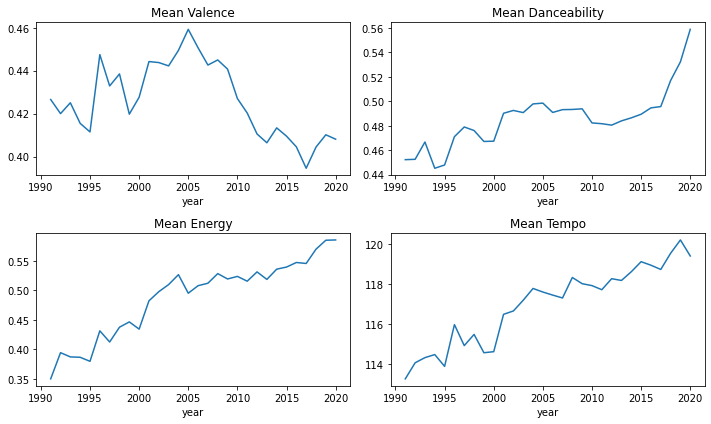

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df.groupby('year').mean()['valence'].plot(ax=axes[0][0], kind='line',rot=0, figsize=(10,6), title = 'Mean Valence')
df.groupby('year').mean()['danceability'].plot(ax=axes[0][1], kind='line',rot=0, figsize=(10,6), title = 'Mean Danceability')
df.groupby('year').mean()['energy'].plot(ax=axes[1][0], kind='line',rot=0, figsize=(10,6), title = 'Mean Energy')
df.groupby('year').mean()['tempo'].plot(ax=axes[1][1], kind='line',rot=0, figsize=(10,6), title = 'Mean Tempo')

plt.tight_layout() # For not having overlap of titles and axes

In [113]:
# Observations:

# Valence: Decreasing through the years, although after 2016 we have a small increase, 
# which falls again in 2020 (maybe because of covid)

# Danceability: Increases as years pass

# Mean Energy: Increases

# Mean Tempo: Increases in general, although in 2020 there was a slight decrease

### 2. How have 'properties' changed throughout the years?

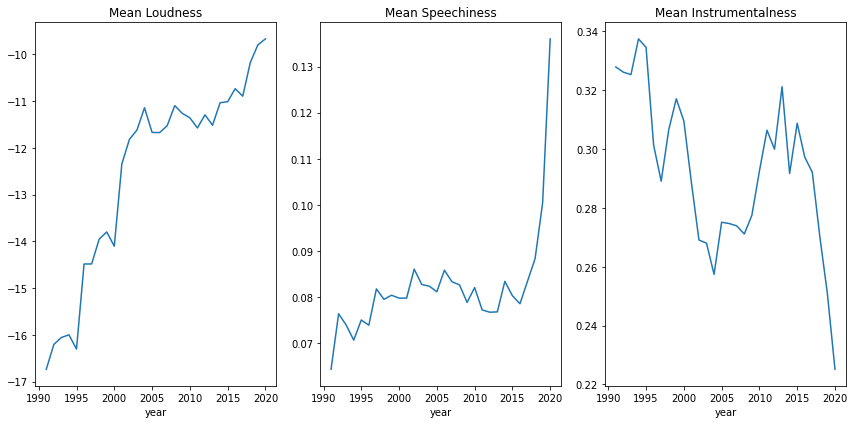

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=3)
df.groupby('year').mean()['loudness'].plot(ax=axes[0], kind='line',rot=0, figsize=(12, 6), title = 'Mean Loudness')
df.groupby('year').mean()['speechiness'].plot(ax=axes[1], kind='line',rot=0, figsize=(12,6), title = 'Mean Speechiness')
df.groupby('year').mean()['instrumentalness'].plot(ax=axes[2], kind='line',rot=0, figsize=(12,6), title = 'Mean Instrumentalness')

plt.tight_layout() 

In [115]:
"""
Instrumentalness:
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. 
Rap or spoken word tracks are clearly “vocal”. 
The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
"""

'\nInstrumentalness:\nPredicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. \nRap or spoken word tracks are clearly “vocal”. \nThe closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.\n'

In [116]:
# Due to the high popularity that 'rap' gained the last years, we can see why 'instrumentalness' has decreased significantly 
# in the recent years.

### 3. How has 'context' changed throughout the years?

In [117]:
# context: liveness, acousticness

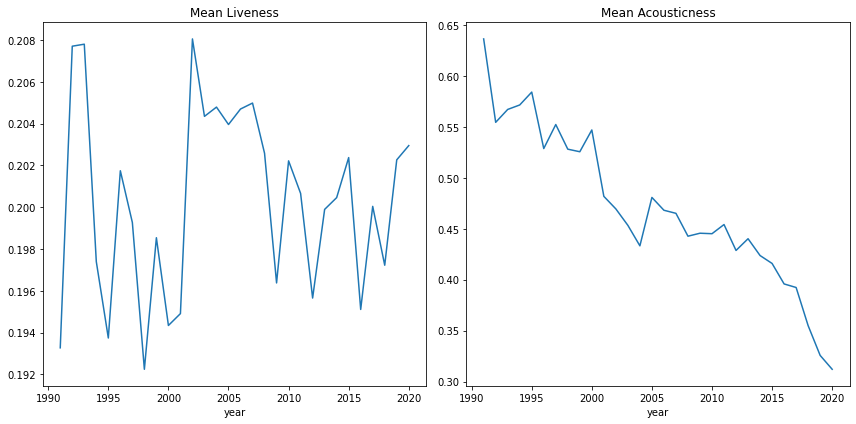

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df.groupby('year').mean()['liveness'].plot(ax=axes[0], kind='line',rot=0, figsize=(12, 6), title = 'Mean Liveness')
df.groupby('year').mean()['acousticness'].plot(ax=axes[1], kind='line',rot=0, figsize=(12,6), title = 'Mean Acousticness')


plt.tight_layout() 

In [119]:
"""
Acousticness:
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means,
as opposed to electric or electronic means.
"""

'\nAcousticness:\nA confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.\n\nAcoustic music is music that solely or primarily uses instruments that produce sound through acoustic means,\nas opposed to electric or electronic means.\n'

In [120]:
# Again, due to the increase of popularity of 'rap','pop','r&b' and 'edm' (electronic music), we can understand the decrease
# of mean acousticness of songs as years pass

In [121]:
# In general, only valence and tempo changed their behaviour, in 2019-2020 (covid years), in comparison with the previous years.

#### All graphs together

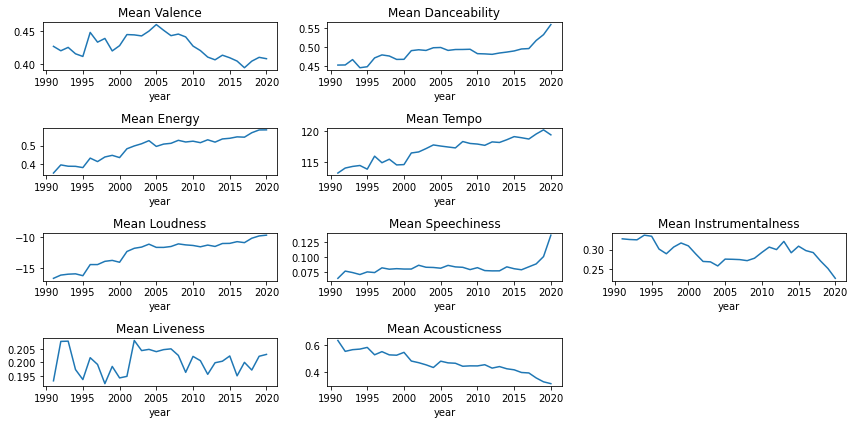

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=3)
df.groupby('year').mean()['valence'].plot(ax=axes[0][0], kind='line',rot=0, figsize=(10,6), title = 'Mean Valence')
df.groupby('year').mean()['danceability'].plot(ax=axes[0][1], kind='line',rot=0, figsize=(10,6), title = 'Mean Danceability')
df.groupby('year').mean()['energy'].plot(ax=axes[1][0], kind='line',rot=0, figsize=(10,6), title = 'Mean Energy')
df.groupby('year').mean()['tempo'].plot(ax=axes[1][1], kind='line',rot=0, figsize=(10,6), title = 'Mean Tempo')
df.groupby('year').mean()['loudness'].plot(ax=axes[2][0], kind='line',rot=0, figsize=(12, 6), title = 'Mean Loudness')
df.groupby('year').mean()['speechiness'].plot(ax=axes[2][1], kind='line',rot=0, figsize=(12,6), title = 'Mean Speechiness')
df.groupby('year').mean()['instrumentalness'].plot(ax=axes[2][2], kind='line',rot=0, figsize=(12,6), title = 'Mean Instrumentalness')
df.groupby('year').mean()['liveness'].plot(ax=axes[3][0], kind='line',rot=0, figsize=(12, 6), title = 'Mean Liveness')
df.groupby('year').mean()['acousticness'].plot(ax=axes[3][1], kind='line',rot=0, figsize=(12,6), title = 'Mean Acousticness')

fig.delaxes(axes[0][2])
fig.delaxes(axes[1][2]) # Remove empty subplots
fig.delaxes(axes[3][2])

plt.tight_layout() # For not having overlap of titles and axes